In [1]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation
import pandas as pd

import matplotlib.pyplot as plt

In [157]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [158]:
X=df.values

In [159]:
X=X[:,1:-1]

In [34]:
#df['y'] = df.y.map({0: 0, 1: 0, 2: 1, 3: 1, 4: 1,5:1})
#df


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,1
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,0
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,1
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,1
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,1
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,0
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,1
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,1


In [160]:
#Splitting data
from sklearn.model_selection import train_test_split


y=np.array(df['y'])
Y=np_utils.to_categorical(y)
Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [50]:
print(X.shape,y.shape)

(11500, 178) (11500,)


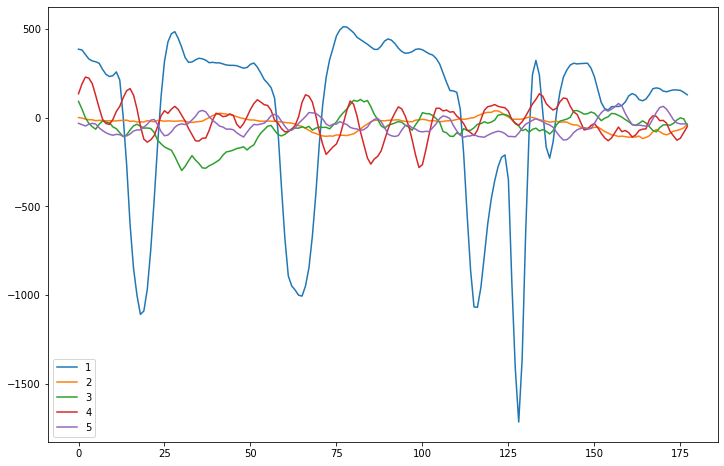

In [7]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

In [161]:
#Creating Sequential Model
model=Sequential()
model.add(Dense(256,input_shape=(45,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [151]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [162]:
#Standardizing training and testing data
X=(X_train[:,::4]-X_train.mean())/X_train.std()
X=np.asarray(X).astype(np.float32)
Y=Y_train[:,1:]
Y=np.asarray(Y).astype(np.float32)

In [163]:
XT=(X_test[:,::4]-X_test.mean())/X_test.std()
XT=np.asarray(XT).astype(np.float32)
YT=Y_test[:,1:]
YT=np.asarray(YT).astype(np.float32)

In [41]:
np.shape(X)

(9200, 45)

In [164]:
#fiting model
history = model.fit(X,Y,10,100,verbose=2,validation_data=(XT,YT))

Epoch 1/100
920/920 - 1s - loss: 0.3621 - accuracy: 0.4850 - val_loss: 0.2914 - val_accuracy: 0.6261
Epoch 2/100
920/920 - 1s - loss: 0.2693 - accuracy: 0.6449 - val_loss: 0.2614 - val_accuracy: 0.6643
Epoch 3/100
920/920 - 1s - loss: 0.2398 - accuracy: 0.6857 - val_loss: 0.2538 - val_accuracy: 0.6687
Epoch 4/100
920/920 - 1s - loss: 0.2233 - accuracy: 0.7027 - val_loss: 0.2566 - val_accuracy: 0.6639
Epoch 5/100
920/920 - 1s - loss: 0.2240 - accuracy: 0.7038 - val_loss: 0.2481 - val_accuracy: 0.6583
Epoch 6/100
920/920 - 1s - loss: 0.2060 - accuracy: 0.7307 - val_loss: 0.2469 - val_accuracy: 0.6817
Epoch 7/100
920/920 - 1s - loss: 0.1925 - accuracy: 0.7472 - val_loss: 0.2796 - val_accuracy: 0.6574
Epoch 8/100
920/920 - 1s - loss: 0.1801 - accuracy: 0.7659 - val_loss: 0.2694 - val_accuracy: 0.6748
Epoch 9/100
920/920 - 1s - loss: 0.1725 - accuracy: 0.7815 - val_loss: 0.2787 - val_accuracy: 0.6609
Epoch 10/100
920/920 - 1s - loss: 0.1626 - accuracy: 0.7947 - val_loss: 0.2830 - val_accura

In [58]:
#predicting model
ypred=model.predict(XT)


In [59]:
#Sepearting classes in Y test
yp=np.zeros((YT.shape[0]))
yo=np.ones((YT.shape[0]))

In [60]:
for i in range(Y_test.shape[0]):
    yp[i]=np.argmax(ypred[i])+1
    yo[i]=np.argmax(Y_test[i])

In [61]:
np.unique(yo)

array([1., 2., 3., 4., 5.])

In [62]:

#conversion of classes
for i in range(Y_test.shape[0]):
    if yo[i]!=1:
        yo[i]=0
    if yp[i]!=1:
        yp[i]=0

In [24]:


# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [27]:
np.shape(yhat_classes)

(2300,)

In [63]:
accuracy_score(yo,yp)

0.9686956521739131

In [64]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yo, yp)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yo, yp)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yo, yp)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yo, yp)
print('F1 score: %f' % f1)

Accuracy: 0.968696
Precision: 0.987245
Recall: 0.852423
F1 score: 0.914894


In [64]:
train_acc = model.evaluate(X, Y, verbose=0)
_, test_acc = model.evaluate(XT, YT, verbose=0)

In [62]:
_, test_acc

(0.6433719396591187, 0.7204347848892212)

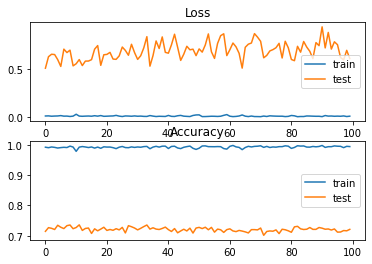

In [65]:
#accuracy loss graph
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## BONN DataSet

In [165]:
df=pd.read_csv('boston.csv')
df

,Unnamed: 0,f1,f2,f3,f4,f5,class
0,0,0.887621,0.185875,2.299474,2.299474,0.581396,healthy
1,1,0.783744,0.163794,2.299480,2.299480,0.588340,healthy
2,2,0.875873,0.154714,2.299477,2.299477,0.589802,healthy
3,3,0.881293,0.138396,2.299481,2.299481,0.592911,healthy
4,4,0.798116,0.125291,2.299481,2.299481,0.595338,healthy
...,...,...,...,...,...,...,...
295,295,0.424106,0.092797,2.301373,2.301373,0.604564,seizure
296,296,0.101266,0.053133,2.301376,2.301376,0.637104,seizure
297,297,0.121906,0.089653,2.301379,2.301379,0.606438,seizure
298,298,0.341561,0.126592,2.301372,2.301372,0.600381,seizure


In [176]:
df2 = df.rename({'class': 'y'}, axis=1)
df2

,Unnamed: 0,f1,f2,f3,f4,f5,y
0,0,0.887621,0.185875,2.299474,2.299474,0.581396,healthy
1,1,0.783744,0.163794,2.299480,2.299480,0.588340,healthy
2,2,0.875873,0.154714,2.299477,2.299477,0.589802,healthy
3,3,0.881293,0.138396,2.299481,2.299481,0.592911,healthy
4,4,0.798116,0.125291,2.299481,2.299481,0.595338,healthy
...,...,...,...,...,...,...,...
295,295,0.424106,0.092797,2.301373,2.301373,0.604564,seizure
296,296,0.101266,0.053133,2.301376,2.301376,0.637104,seizure
297,297,0.121906,0.089653,2.301379,2.301379,0.606438,seizure
298,298,0.341561,0.126592,2.301372,2.301372,0.600381,seizure


In [177]:
df2['y'] = df2.y.map({'healthy': 0, 'seizure': 1, 'transation': 2})
df2


,Unnamed: 0,f1,f2,f3,f4,f5,y
0,0,0.887621,0.185875,2.299474,2.299474,0.581396,0
1,1,0.783744,0.163794,2.299480,2.299480,0.588340,0
2,2,0.875873,0.154714,2.299477,2.299477,0.589802,0
3,3,0.881293,0.138396,2.299481,2.299481,0.592911,0
4,4,0.798116,0.125291,2.299481,2.299481,0.595338,0
...,...,...,...,...,...,...,...
295,295,0.424106,0.092797,2.301373,2.301373,0.604564,1
296,296,0.101266,0.053133,2.301376,2.301376,0.637104,1
297,297,0.121906,0.089653,2.301379,2.301379,0.606438,1
298,298,0.341561,0.126592,2.301372,2.301372,0.600381,1


In [178]:
X=df2.values


In [179]:
X=X[:,1:-1]
X


array([[0.8876206 , 0.18587486, 2.29947393, 2.29947393, 0.58139559],
       [0.78374388, 0.16379436, 2.29947989, 2.29947989, 0.58834032],
       [0.87587262, 0.15471405, 2.29947693, 2.29947693, 0.58980158],
       ...,
       [0.12190591, 0.08965272, 2.30137916, 2.30137916, 0.60643813],
       [0.34156111, 0.12659211, 2.30137162, 2.30137162, 0.60038083],
       [0.25939333, 0.09691405, 2.3013799 , 2.3013799 , 0.59970394]])

In [180]:
y=np.array(df2['y'])
Y=np_utils.to_categorical(y)
Y.shape


(300, 3)

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [172]:
np.shape(Y_train)

(240,)

In [182]:
X=(X_train-X_train.mean())/X_train.std()
X=np.asarray(X).astype(np.float32)
Y=Y_train[:,1:]
Y=np.asarray(Y).astype(np.float32)

In [183]:
XT=(X_test-X_test.mean())/X_test.std()
XT=np.asarray(XT).astype(np.float32)
YT=Y_test[:,1:]
YT=np.asarray(YT).astype(np.float32)

In [184]:
np.shape(X)

(210, 5)

In [185]:
np.shape(XT)

(90, 5)

In [76]:
np.shape(YT)

(2300, 5)

In [186]:
model=Sequential()


model.add(Dense(256,input_shape=(5,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 256)               1536      
_________________________________________________________________
activation_110 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_111 (Dense)            (None, 128)               32896     
_________________________________________________________________
activation_111 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 128)               16512     
_________________________________________________________________
activation_112 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_113 (Dense)            (None, 64)              

In [187]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [188]:
hist1 = model.fit(X,Y,validation_data=(XT,YT),epochs = 50, batch_size=10,shuffle=False)


Epoch 1/50
21/21 [==============================] - 0s 8ms/step - loss: 0.6924 - accuracy: 0.3952 - val_loss: 0.6871 - val_accuracy: 0.4556
Epoch 2/50
21/21 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5000 - val_loss: 0.6580 - val_accuracy: 0.4889
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.5762 - val_loss: 0.6130 - val_accuracy: 0.5889
Epoch 4/50
21/21 [==============================] - ETA: 0s - loss: 0.6341 - accuracy: 0.60 - 0s 3ms/step - loss: 0.6285 - accuracy: 0.6810 - val_loss: 0.6189 - val_accuracy: 0.8444
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.7143 - val_loss: 0.6109 - val_accuracy: 0.5889
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 0.6253 - accuracy: 0.7333 - val_loss: 0.5992 - val_accuracy: 0.6667
Epoch 7/50
21/21 [==============================] - 0s 3ms/step - loss: 0.6093 - accuracy: 0.7333 - val_loss: 0.5925 -

In [189]:
ypred=model.predict(XT)
yp=np.zeros((YT.shape[0]))
yo=np.ones((YT.shape[0]))
for i in range(Y_test.shape[0]):
    yp[i]=np.argmax(ypred[i])+1
    yo[i]=np.argmax(Y_test[i])

In [190]:
np.unique(yo)

array([0., 1., 2.])

In [191]:

#conversion of classes
for i in range(Y_test.shape[0]):
    if yo[i]!=1:
        yo[i]=0
    if yp[i]!=1:
        yp[i]=0

In [192]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yo, yp)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yo, yp)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yo, yp)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yo, yp)

Accuracy: 0.755556
Precision: 0.594595
Recall: 0.758621


In [193]:
train_acc = model.evaluate(X, Y, verbose=0)
_, test_acc = model.evaluate(XT, YT, verbose=0)

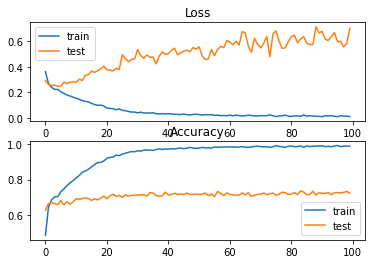

In [194]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [140]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist1.history['val_accuracy'], label='boston_test')
pyplot.plot(history.history['val_accuracy'], label='eeg_test')
pyplot.legend()
pyplot.show()

TypeError: only integer scalar arrays can be converted to a scalar index

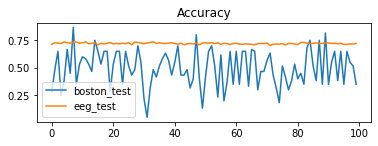

In [92]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist.history['val_accuracy'], label='boston_test')
pyplot.plot(history.history['val_accuracy'], label='eeg_test')
pyplot.legend()
pyplot.show()

## CHB MIT DATASET

In [146]:
multiple_patients = True
ID = False
data = pd.read_csv("CHB_MIT.csv")
data = data.sample(n=10000)
X = data.loc[:, data.columns != "seizure"]
X = X.loc[:, X.columns != "start_time"]
X = X.loc[:, X.columns != "file ID"]
Y = np.asarray(data['seizure'])
feature_names = X.columns.tolist()
print('The number of samples for the non-seizure class is:', Y.shape[0])
print('The number of samples for the seizure class is:', np.sum(Y))

# if multiple patients, one-hot encode patient ID
if multiple_patients:
    X = X.loc[:, X.columns != "subject"] 
    if ID:
        patient = pd.get_dummies(data['subject'], prefix='subject')
        X = pd.concat([X, patient], axis = 1)

The number of samples for the non-seizure class is: 10000
The number of samples for the seizure class is: 36


In [147]:
X=X.values
#X=X[:,1:]
X

array([[3.36538612e-05, 1.13077610e-09, 1.60437679e+00, ...,
        9.99873865e-02, 4.81060949e-02, 2.39557580e-02],
       [5.72801479e-05, 3.28157872e-09, 5.35420619e+00, ...,
        1.48856998e-01, 1.70253536e-01, 2.12398324e-01],
       [1.51446600e-05, 2.29435225e-10, 1.81620130e+00, ...,
        1.51301987e-01, 2.32017778e-01, 2.78027476e-01],
       ...,
       [3.40430631e-05, 1.15929321e-09, 2.56175584e+01, ...,
        1.18277934e-01, 9.30480217e-02, 8.61704110e-02],
       [2.90599491e-05, 8.12668763e-10, 4.91507710e+00, ...,
        1.79557119e-01, 1.78113147e-01, 1.10264086e-01],
       [1.38537201e-05, 1.91956198e-10, 1.97804896e+00, ...,
        2.31986301e-01, 8.26050688e-02, 7.85151243e-02]])

In [148]:
y=np.array(data['seizure'])
Y=np_utils.to_categorical(y)
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [149]:
np.shape(X_train)

(800, 16)

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [151]:
np.shape(X_train)

(8000, 506)

In [152]:
np.shape(Y)

(10000, 2)

In [153]:
X=(X_train-X_train.mean())/X_train.std()
X=np.asarray(X).astype(np.float32)

In [154]:
XT=(X_test-X_test.mean())/X_test.std()
XT=np.asarray(XT).astype(np.float32)

In [ ]:
np

In [155]:
model=Sequential()


model.add(Dense(256,input_shape=(506,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 256)               129792    
_________________________________________________________________
activation_176 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_177 (Dense)            (None, 128)               32896     
_________________________________________________________________
activation_177 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_178 (Dense)            (None, 128)               16512     
_________________________________________________________________
activation_178 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_179 (Dense)            (None, 64)              

In [156]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
hist1 = model.fit(X,Y_train,10,100,verbose=2,validation_data=(XT,Y_test))

Epoch 1/100
800/800 - 3s - loss: 0.0535 - accuracy: 0.9966 - val_loss: 0.0690 - val_accuracy: 0.9955
Epoch 2/100
800/800 - 2s - loss: 0.0518 - accuracy: 0.9966 - val_loss: 0.0690 - val_accuracy: 0.9955
Epoch 3/100
800/800 - 3s - loss: 0.0518 - accuracy: 0.9966 - val_loss: 0.0690 - val_accuracy: 0.9955
Epoch 4/100
800/800 - 3s - loss: 0.0518 - accuracy: 0.9966 - val_loss: 0.0690 - val_accuracy: 0.9955
Epoch 5/100
800/800 - 3s - loss: 0.0518 - accuracy: 0.9966 - val_loss: 0.0690 - val_accuracy: 0.9955
Epoch 6/100
800/800 - 3s - loss: 0.0518 - accuracy: 0.9966 - val_loss: 0.0690 - val_accuracy: 0.9955
Epoch 7/100
800/800 - 3s - loss: 0.0518 - accuracy: 0.9966 - val_loss: 0.0690 - val_accuracy: 0.9955
Epoch 8/100
800/800 - 4s - loss: 0.0518 - accuracy: 0.9966 - val_loss: 0.0690 - val_accuracy: 0.9955
Epoch 9/100
800/800 - 4s - loss: 0.0518 - accuracy: 0.9966 - val_loss: 0.0690 - val_accuracy: 0.9955
Epoch 10/100
800/800 - 3s - loss: 0.0518 - accuracy: 0.9966 - val_loss: 0.0690 - val_accura

In [107]:
train_acc = model.evaluate(X, Y_train, verbose=0)
test_acc = model.evaluate(XT, Y_test, verbose=0)
test_acc

[0.0365942046046257, 0.9950000047683716]

## Comparison of3 Models

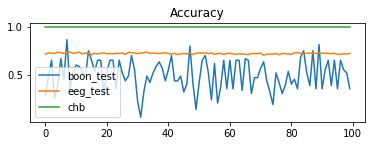

In [108]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist.history['val_accuracy'], label='boon_test')
pyplot.plot(history.history['val_accuracy'], label='eeg_test')
pyplot.plot(hist1.history['val_accuracy'], label='chb')
pyplot.legend()
pyplot.show()